<a href="https://colab.research.google.com/github/Niloofar-SecML/CNN/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [41]:
# Seed for reproducibility
SEED = 1
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [42]:
# 1. Data Preparation
def create_data(n_samples=1000, noise=0.1):
    """
    Creates a synthetic dataset of non-linearly separable points.

    Args:
        n_samples: The number of data points to generate.
        noise: The amount of noise to add to the data.

    Returns:
        X: Input features (shape: (n_samples, 2)).
        y: Binary labels (shape: (n_samples,)).
    """
    X, y = make_circles(n_samples=n_samples, noise=noise, random_state=SEED)
    y = y.reshape(-1, 1)  # Reshape y to (n_samples, 1)
    return X, y

In [43]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    """
    Plots the decision boundary of a trained model.

    Args:
        model: A trained TensorFlow model.
        X: Input features.
        y: True labels.
        title: Title of the plot
    """
    # Define the grid range
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Generate predictions for the grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.round(Z).reshape(xx.shape) # Round the predictions to the nearest class

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [44]:
# Create the dataset
X, y = create_data(n_samples=1000, noise=0.1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

# 2. Model без Regularization
def create_model_without_regularization(input_shape):
    """
    Creates a TensorFlow model without any regularization.

    Args:
        input_shape: The shape of the input data.

    Returns:
        A TensorFlow model.
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=input_shape, name='dense_1'),
        tf.keras.layers.Dense(64, activation='relu', name='dense_2'),
        tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')
    ])
    return model

In [45]:
# 3. Model с L2 Regularization
def create_model_with_l2_regularization(input_shape, l2_lambda=0.01):
    """
    Creates a TensorFlow model with L2 regularization.

    Args:
        input_shape: The shape of the input data.
        l2_lambda: The L2 regularization parameter.

    Returns:
        A TensorFlow model.
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=input_shape,
                               kernel_regularizer=tf.keras.regularizers.l2(l2_lambda), name='dense_1'),
        tf.keras.layers.Dense(64, activation='relu',
                               kernel_regularizer=tf.keras.regularizers.l2(l2_lambda), name='dense_2'),
        tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')
    ])
    return model


In [46]:
# 4. Model с Dropout Regularization
def create_model_with_dropout(input_shape, dropout_rate=0.3):
    """
    Creates a TensorFlow model with dropout regularization.

    Args:
        input_shape: The shape of the input data.
        dropout_rate: The dropout rate.

    Returns:
        A TensorFlow model.
    """
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=input_shape, name='dense_1'),
        tf.keras.layers.Dropout(dropout_rate, name='dropout_1'),
        tf.keras.layers.Dense(64, activation='relu', name='dense_2'),
        tf.keras.layers.Dropout(dropout_rate, name='dropout_2'),
        tf.keras.layers.Dense(1, activation='sigmoid', name='output_layer')
    ])
    return model

In [47]:
# 5. Training Function
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32, title="Model"):
    """
    Trains and evaluates a TensorFlow model.

    Args:
        model: The TensorFlow model to train.
        X_train: Training input data.
        y_train: Training labels.
        X_val: Validation input data.
        y_val: Validation labels.
        epochs: The number of training epochs.
        batch_size: The batch size.
        title: Title of the training process.

    Returns:
        The trained model.
    """
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)
    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
    print(f"{title} - Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")
    plot_decision_boundary(model, X_val, y_val, title=title)
    return model, history

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


No Regularization - Validation Loss: 0.4000, Validation Accuracy: 0.8450
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


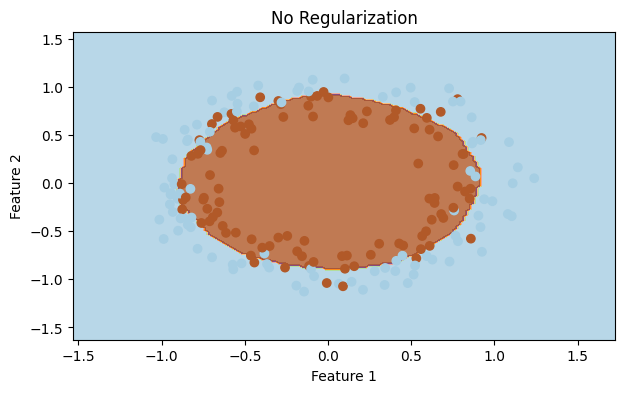

L2 Regularization (λ=0.01) - Validation Loss: 0.4779, Validation Accuracy: 0.8400
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


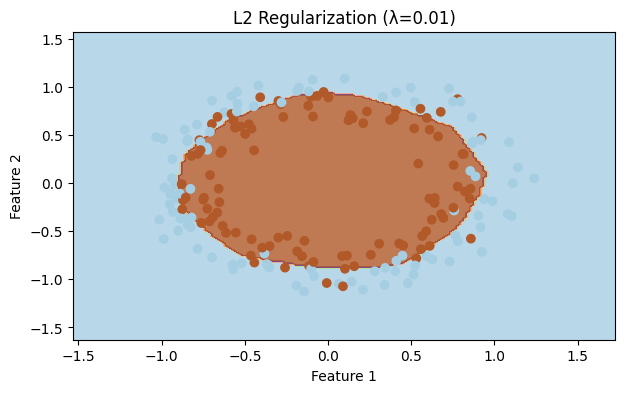

Dropout (Rate=0.3) - Validation Loss: 0.3980, Validation Accuracy: 0.8450
826/826 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


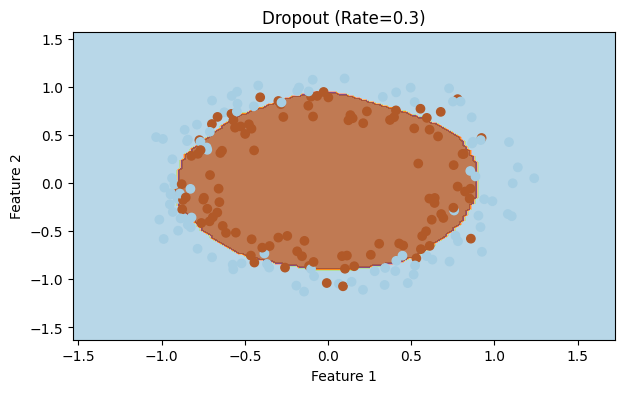

In [48]:
# 6. Run Models and Compare
input_shape = (X_train.shape[1],)  # Determine the input shape

# Model without regularization
model_no_reg = create_model_without_regularization(input_shape)
model_no_reg, history_no_reg = train_and_evaluate_model(model_no_reg, X_train, y_train, X_val, y_val, epochs=200, title="No Regularization")

# Model with L2 regularization
l2_lambda = 0.01  # Example L2 regularization parameter
model_l2 = create_model_with_l2_regularization(input_shape, l2_lambda)
model_l2, history_l2 = train_and_evaluate_model(model_l2, X_train, y_train, X_val, y_val, epochs=200, title=f"L2 Regularization (λ={l2_lambda})")

# Model with Dropout
dropout_rate = 0.3 # Example dropout rate
model_dropout = create_model_with_dropout(input_shape, dropout_rate)
model_dropout, history_dropout = train_and_evaluate_model(model_dropout, X_train, y_train, X_val, y_val, epochs=200, title=f"Dropout (Rate={dropout_rate})")


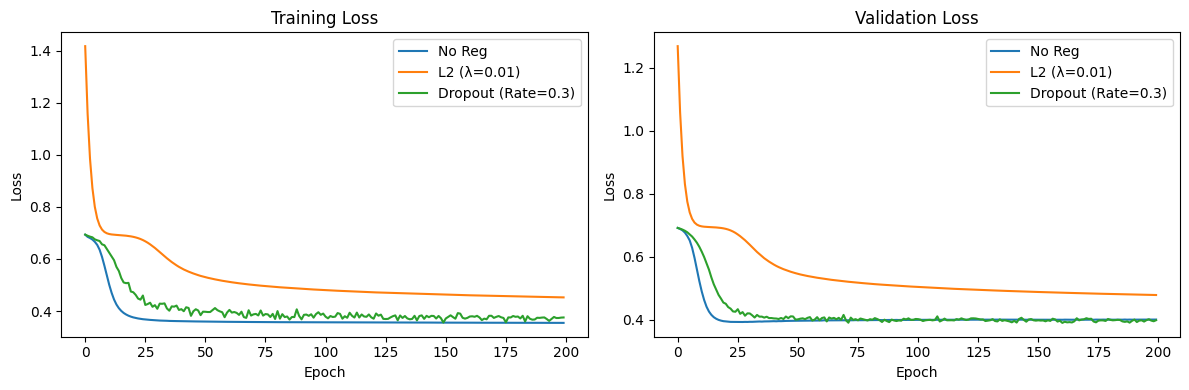

In [50]:
# 7. Plotting the Comparison
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_reg.history['loss'], label='No Reg')
plt.plot(history_l2.history['loss'], label=f'L2 (λ={l2_lambda})')
plt.plot(history_dropout.history['loss'], label=f'Dropout (Rate={dropout_rate})')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_no_reg.history['val_loss'], label='No Reg')
plt.plot(history_l2.history['val_loss'], label=f'L2 (λ={l2_lambda})')
plt.plot(history_dropout.history['val_loss'], label=f'Dropout (Rate={dropout_rate})')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()